<a href="https://colab.research.google.com/github/Pilli-Venkat/Web-Scrapping-FIFA-Dataset-Analysis/blob/main/FIFA_Dataset_Analysis(Web_Scrapping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [211]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup 
import requests
import matplotlib.pyplot as plt

# Web Scrapping

In [127]:
Image_link   =  []
Name=[]
Age    =        []
OVA     =       []
POT      =      []
Team    =       []
Duration =     []
Value    =     []
Wage     =      []
Total_stats =  []
Hits    =      []

In [128]:
for j in range(1,11):
   url = f'https://sofifa.com/players?offset={j}'
   req= requests.get(url)
   soup = BeautifulSoup(req.content,'html.parser')
   for i in range(0,60):
    #name
    Name.append(re.sub('<a.*tip="|".*','',str(soup.findAll('a', class_ = "tooltip")[i])))
    #age
    Age.append(re.sub('<td.*e">|</td>','',str(soup.findAll('td', class_ = "col col-ae")[i])))
    #ova
    OVA.append(soup.findAll('td',class_ = 'col col-oa')[i].text)
    #pot
    POT.append(soup.findAll('td',class_ = 'col col-pt')[i].text)
    #team
    Team.append(re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(soup.findAll('tr')[1+i].findAll('a')[-1])))
    #Duration
    Duration.append(re.sub('<div.*>\n|<.*','',str(soup.findAll('div', class_ = "sub")[i])))
    #'Value', 
    Value.append(re.sub('<td.*">€|M</td>|</td>|K','',str(soup.findAll('td', class_ = "col col-vl")[i])))
    #'Wage',
    Wage.append(re.sub('<td.*">€|K</td>|</td>','',str(soup.findAll('td', class_ = "col col-wg")[i])) )
    # 'Total_stats', 
    Total_stats.append(re.sub('<span.*p">|</span>','',str(soup.findAll('span', class_ = "bp3-tag p")[i])))
    
    #'Hits'
    Hits.append(re.sub('<td.*">\n|K</td>|</td>','',str(soup.findAll('td', class_ = "col-comment")[i])) )
 





# Creating DataFrame

In [129]:
fifa = pd.DataFrame({'Name':Name, 'Age':Age, 
                     'OVA':OVA, 'POT':POT , 'Team':Team,
                     'Duration':Duration , 'Value':Value, 'Wage': Wage, 
                     'Total_stats':Total_stats, 'Hits':Hits})

# Data Exploration , Data cleaning , Data Manipulation

In [131]:
fifa.head()

,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,Neal Maupay,23,77,81,Brighton & Hove Albion,2019 ~ 2023,15.5,52,1932,1.2
1,Joseph Minala,23,68,74,Lazio,2013 ~ 2025,1.9,17,1821,1.1
2,Christos Tzolis,18,73,87,PAOK,2019 ~ 2024,7,500,1875,876
3,Saúl Ñíguez Esclápez,25,83,86,Atlético Madrid,2013 ~ 2026,47.5,71,2211,857
4,Kylian Mbappé,21,90,95,Paris Saint-Germain,2018 ~ 2022,185.5,160,2157,811


In [137]:
fifa.tail()

,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
595,Federico Valverde,21,83,89,Real Madrid,2016 ~ 2025,58.0,135,2173,171.0
596,Adam Hložek,17,74,87,Sparta Praha,2019 ~ 2022,9.5,500,1881,168.0
597,Jadon Sancho,20,87,92,Borussia Dortmund,2017 ~ 2023,118.5,82,2011,167.0
598,Alan Velasco,17,73,86,Independiente,2018 ~ 2023,7.0,2,1884,164.0
599,Weston McKennie,21,77,85,Juventus,2021 ~ 2025,23.5,48,2125,163.0


In [138]:
fifa.shape

(600, 10)

In [132]:
fifa.columns

Index(['Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value', 'Wage',
       'Total_stats', 'Hits'],
      dtype='object')

In [133]:
fifa.dtypes

Name           object
Age            object
OVA            object
POT            object
Team           object
Duration       object
Value          object
Wage           object
Total_stats    object
Hits           object
dtype: object

Converting Data types into numerics

In [134]:
fifa['Age'] = pd.to_numeric(fifa['Age'])
fifa['OVA'] = pd.to_numeric(fifa['OVA'])
fifa['POT'] = pd.to_numeric(fifa['POT'])
fifa['Value'] = pd.to_numeric(fifa['Value'])
fifa['Wage'] = pd.to_numeric(fifa['Wage'])
fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
fifa['Hits'] = pd.to_numeric(fifa['Hits'])

In [135]:
fifa.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,20.885000,77.458333,86.336667,42.65400,86.991667,1934.396667,291.524000
std,3.733408,6.377255,4.124116,82.52751,134.087686,212.230234,147.053857
min,16.000000,60.000000,73.000000,0.00000,0.000000,1039.000000,1.100000
25%,18.000000,74.000000,84.000000,9.50000,11.000000,1840.000000,192.000000
50%,20.000000,78.000000,87.000000,24.50000,40.000000,1957.000000,237.000000
75%,23.000000,81.000000,89.000000,45.50000,82.000000,2086.000000,329.000000
max,35.000000,93.000000,95.000000,625.00000,560.000000,2347.000000,877.000000


In [136]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Age          600 non-null    int64  
 2   OVA          600 non-null    int64  
 3   POT          600 non-null    int64  
 4   Team         600 non-null    object 
 5   Duration     600 non-null    object 
 6   Value        600 non-null    float64
 7   Wage         600 non-null    int64  
 8   Total_stats  600 non-null    int64  
 9   Hits         600 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 47.0+ KB


Duplicate Datas

In [172]:
fifa.duplicated().sum(axis=0)

452

In [173]:
fifa.drop_duplicates(inplace=True)

In [174]:
fifa.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,21.297297,77.844595,86.310811,37.129054,88.087838,1933.081081,338.191216
std,4.043067,6.313481,4.313957,59.254630,132.252229,212.836161,185.310338
min,16.000000,60.000000,73.000000,0.000000,0.000000,1039.000000,1.100000
25%,18.000000,74.000000,84.000000,9.500000,15.000000,1840.000000,192.750000
50%,21.000000,78.000000,87.000000,23.750000,40.000000,1947.000000,257.500000
75%,23.000000,81.000000,89.000000,45.500000,81.250000,2086.000000,456.750000
max,35.000000,93.000000,95.000000,625.000000,560.000000,2347.000000,877.000000


In [204]:
fifa.shape

(148, 10)

# Data Analysis

Find the name of the player who is having the highest wage.

In [273]:
name=fifa[fifa['Wage']==max(fifa['Wage'])]['Name'].unique()
print(f'The name of the player who is having the highest wage : {name[0]}')

The name of the player who is having the highest wage : Lionel Messi


Find the youngest player



In [184]:
(fifa[fifa.Age== min(fifa.Age)]['Name'].unique())[0]
print(f"The youngest player is {(fifa[fifa.Age== min(fifa.Age)]['Name'].unique())[0]}")

The youngest player is Rayan Cherki


Find the oldest player

In [188]:
(fifa[fifa.Age== max(fifa.Age)]['Name'].unique())[0]
print(f"The oldest player is {(fifa[fifa.Age== max(fifa.Age)]['Name'].unique())[0]}")

The oldest player is C. Ronaldo dos Santos Aveiro


List out the Top 10 players according to their POT

In [203]:
(fifa.sort_values(by='POT',ascending=False)['Name'].unique())[0:10]

array(['Kylian Mbappé', 'Lionel Messi', 'Erling Haaland',
       'C. Ronaldo dos Santos Aveiro', 'Jadon Sancho', 'Phil Foden',
       'Pedro González López', 'Frenkie de Jong', 'Matvey Safonov',
       'Bruno Miguel Borges Fernandes'], dtype=object)

In [206]:
name_pot = fifa[['Name','POT']]

In [207]:
name_pot

,Name,POT
0,Neal Maupay,81
1,Joseph Minala,74
2,Christos Tzolis,87
3,Saúl Ñíguez Esclápez,86
4,Kylian Mbappé,95
...,...,...
559,Vinícius José de Oliveira Júnior,90
562,Ben White,87
584,Frenkie de Jong,91
586,Adama Traoré Diarra,81


Plot a graph - Player's Name V/s Player's POT

Text(0, 0.5, 'POT')

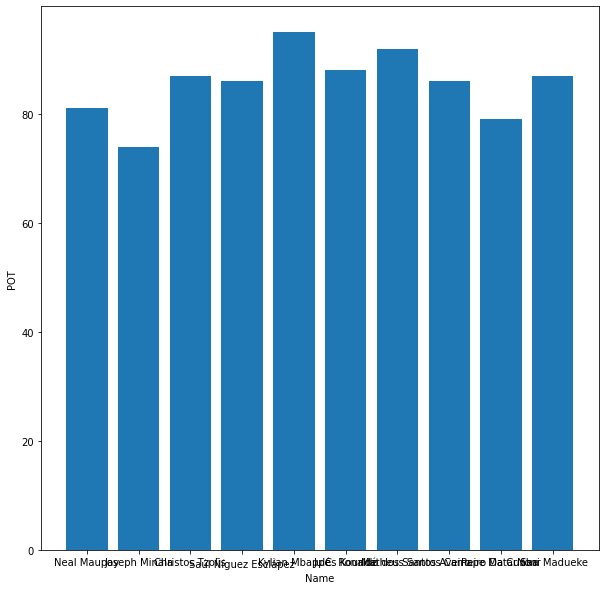

In [217]:
plt.figure(figsize=(10,10))
plt.bar(name_pot.Name.head(10),name_pot.POT.head(10))
plt.xlabel('Name')
plt.ylabel('POT')


Plot a graph - Player's Name V/s Player's Wage

Text(0, 0.5, 'Wage')

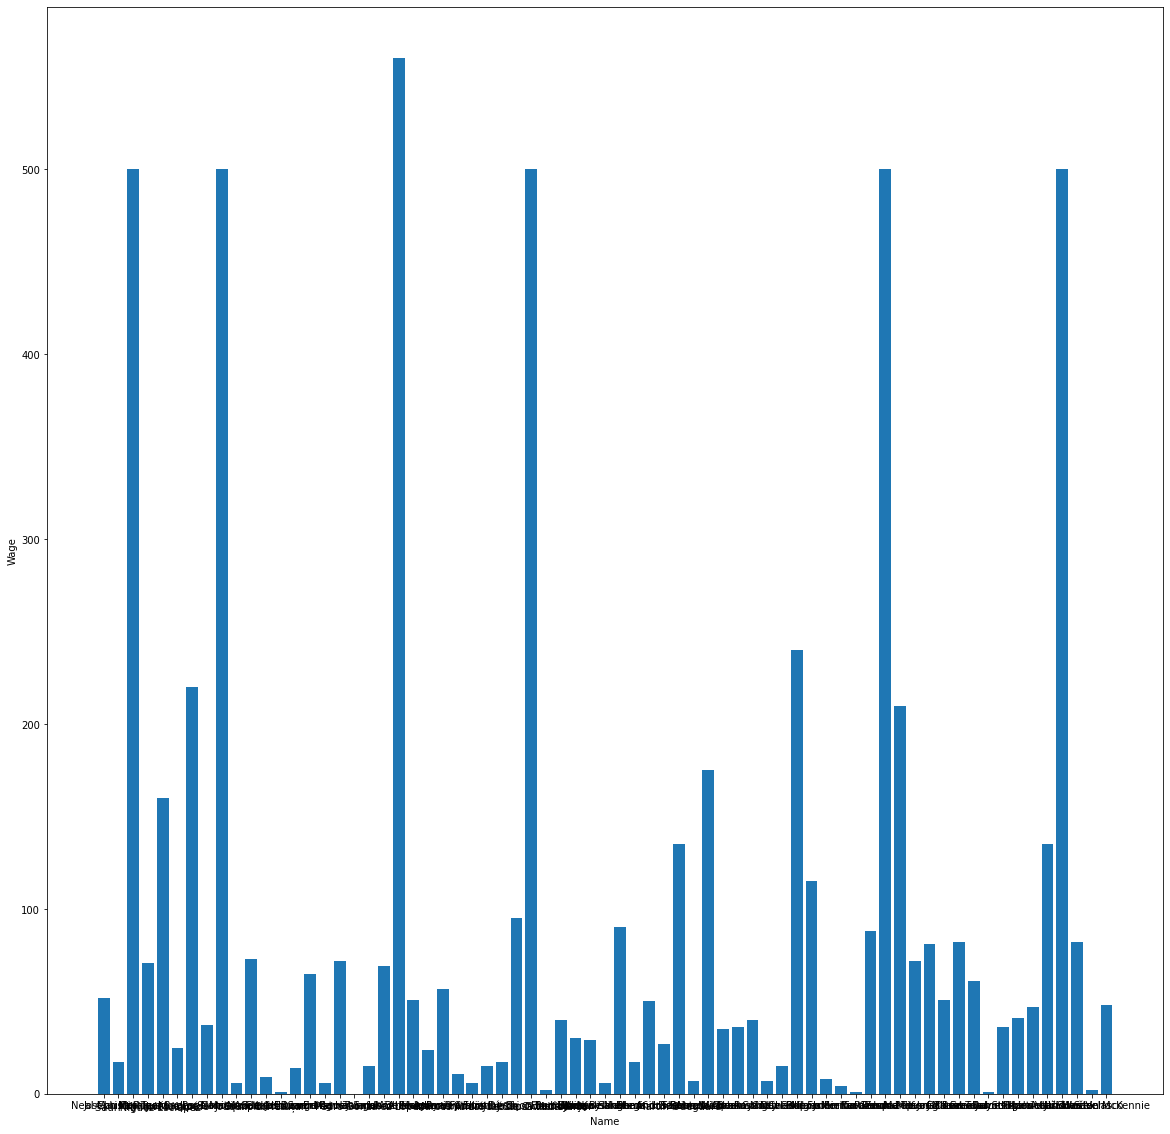

In [220]:
plt.figure(figsize=(20,20))
plt.bar(fifa.Name,fifa.Wage)
plt.xlabel('Name')
plt.ylabel('Wage')


Find the player who has scored highest number of goals

In [221]:
print(f"The highest score of player is {(fifa[fifa.Hits== min(fifa.Hits)]['Name'].unique())[0]}")

The highest score of player is Joseph Minala


Find all the players whose Potential is more than equal to 90

In [225]:
fifa[fifa.POT > 90]['Name']

4                      Kylian Mbappé
6       C. Ronaldo dos Santos Aveiro
16                    Erling Haaland
17                    Matvey Safonov
18              Pedro González López
20                      Lionel Messi
47     Bruno Miguel Borges Fernandes
48                        Phil Foden
54                   Frenkie de Jong
122                    Kylian Mbappé
135                   Matvey Safonov
183     C. Ronaldo dos Santos Aveiro
242     C. Ronaldo dos Santos Aveiro
252                   Erling Haaland
312                   Matvey Safonov
315                     Lionel Messi
360     C. Ronaldo dos Santos Aveiro
407                  Frenkie de Jong
429                   Erling Haaland
431             Pedro González López
479                     Jadon Sancho
549             Pedro González López
584                  Frenkie de Jong
Name: Name, dtype: object

Find all the players whose Potential is more than 90 and the age < 20

In [233]:
fifa[(fifa.POT > 90) & (fifa.Age < 20) ]['Name']

16           Erling Haaland
18     Pedro González López
252          Erling Haaland
429          Erling Haaland
431    Pedro González López
549    Pedro González López
Name: Name, dtype: object

Find all the players whose values >10 but wage <50

In [234]:
fifa[(fifa.Value > 10) & (fifa.Wage < 50) ]['Name']

5                          Jules Koundé
7      Matheus Santos Carneiro Da Cunha
15                    Eduardo Camavinga
18                 Pedro González López
22                       Anssumane Fati
25                     Ryan Gravenberch
26                            Luis Díaz
31                            Ben White
32                      Boubacar Kamara
33                          Bukayo Saka
34                      Jude Bellingham
36            Antony Matheus dos Santos
38                   Dominik Szoboszlai
40                        Florian Wirtz
42                      Mason Greenwood
44                      Alphonso Davies
46                           Cody Gakpo
50        Nuno Alexandre Tavares Mendes
81                       Anssumane Fati
123                        Jules Koundé
149                           Ben White
160                     Mason Greenwood
179    Gabriel Teodoro Martinelli Silva
184    Matheus Santos Carneiro Da Cunha
199                      Anssumane Fati


List out the players in FC Barcelona team

In [260]:
fifa[fifa.Team == 'FC Barcelona']['Name']

18     Pedro González López
20             Lionel Messi
22           Anssumane Fati
37             Sergiño Dest
49             Ilaix Moriba
54          Frenkie de Jong
81           Anssumane Fati
199          Anssumane Fati
315            Lionel Messi
407         Frenkie de Jong
431    Pedro González López
435          Anssumane Fati
549    Pedro González López
553          Anssumane Fati
584         Frenkie de Jong
Name: Name, dtype: object

Total number of teams and name of teams

In [246]:
print(f'Total number of teams : {fifa.Team.nunique()}')

Total number of teams : 46


In [247]:
print(f'Total teams : {fifa.Team.unique()}')

Total teams : ['Brighton & Hove Albion' 'Lazio' 'PAOK' 'Atlético Madrid'
 'Paris Saint-Germain' 'Sevilla FC' 'Juventus' 'Hertha BSC' 'FC Metz'
 'PSV' 'FCSB (Steaua)' 'SK Rapid Wien' 'SV Werder Bremen'
 'Olympique Lyonnais' 'Stade Rennais FC' 'Borussia Dortmund' 'Russia'
 'FC Barcelona' 'West Ham United' 'Hellas Verona' 'Blackburn Rovers'
 'Ajax' 'FC Porto' 'Real Valladolid CF' 'Real Madrid' 'Dinamo Zagreb'
 'New England Revolution' 'Olympique de Marseille' 'Arsenal' 'Everton'
 'RB Leipzig' 'Bayer 04 Leverkusen' 'Inter' 'Manchester United'
 'FC Bayern München' 'Manchester City' 'Sporting CP' 'Deportes Tolima'
 'Chelsea' 'FC Dallas' 'Wolverhampton Wanderers' 'Aston Villa'
 'FC St. Gallen' 'PFC CSKA Moscow' 'Sparta Praha' 'Independiente']


List out the names of the players in each team respectively

In [272]:
for i in range(fifa.Team.nunique()):
  print(f'Team Name : {(fifa.Team.unique())[i]}') 
  print('Players')
  print((fifa[fifa.Team ==(fifa.Team.unique())[i] ]['Name']).unique())
  print('\n')

Team Name : Brighton & Hove Albion
Players
['Neal Maupay' 'Ben White' 'Yves Bissouma']


Team Name : Lazio
Players
['Joseph Minala' 'Joaquín Correa']


Team Name : PAOK
Players
['Christos Tzolis']


Team Name : Atlético Madrid
Players
['Saúl Ñíguez Esclápez']


Team Name : Paris Saint-Germain
Players
['Kylian Mbappé']


Team Name : Sevilla FC
Players
['Jules Koundé']


Team Name : Juventus
Players
['C. Ronaldo dos Santos Aveiro' 'Weston McKennie']


Team Name : Hertha BSC
Players
['Matheus Santos Carneiro Da Cunha']


Team Name : FC Metz
Players
['Pape Matar Sarr']


Team Name : PSV
Players
['Noni Madueke' 'Cody Gakpo']


Team Name : FCSB (Steaua)
Players
['Olimpiu Moruțan']


Team Name : SK Rapid Wien
Players
['Yusuf Demir']


Team Name : SV Werder Bremen
Players
['Josh Sargent']


Team Name : Olympique Lyonnais
Players
['Houssem Aouar' 'Maxwel Cornet' 'Rayan Cherki']


Team Name : Stade Rennais FC
Players
['Eduardo Camavinga']


Team Name : Borussia Dortmund
Players
['Erling Haaland'